In [1]:
path = "../input/scene_classification/scene_classification/train/"

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 256

In [4]:
df = pd.read_csv('../input/scene_classification/scene_classification/train.csv')
df.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [5]:
tfms = get_transforms(flip_vert=False,max_zoom=1.0,max_warp=0)
data = (ImageList.from_csv(path, csv_name = '../train.csv') 
        .split_by_rand_pct()              
        .label_from_df()            
        .add_test_folder(test_folder = '../test')              
        .transform(tfms, size=256)
        .databunch(num_workers=0))

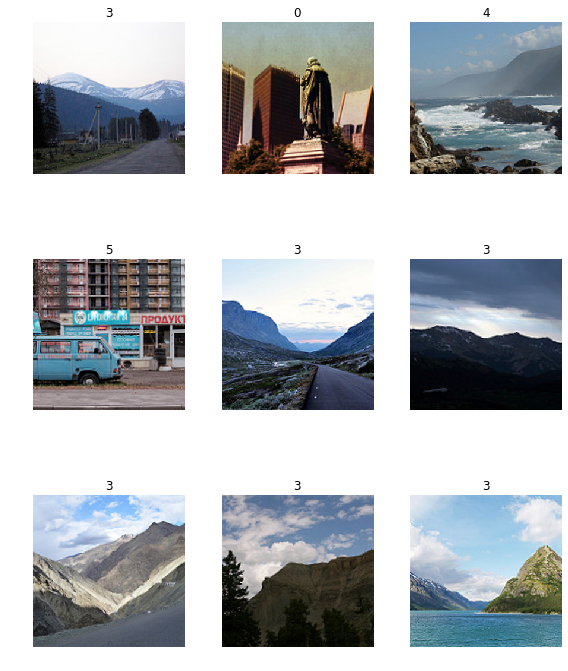

In [6]:
data.show_batch(rows=3, figsize=(8,10))

In [7]:
print(data.classes)

[0, 1, 2, 3, 4, 5]


In [8]:
learn_34 = cnn_learner(data, models.resnet34, metrics=[error_rate, accuracy], model_dir="/tmp/model/")
learn_50 = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy], model_dir="/tmp/model/")
learn_101 = cnn_learner(data, models.resnet101, metrics=[error_rate, accuracy], model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
87306240it [00:03, 24845534.17it/s]
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.torch/models/resnet50-19c8e357.pth
102502400it [00:05, 18351397.47it/s]
Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /tmp/.torch/models/resnet101-5d3b4d8f.pth
178728960it [00:01, 102731446.73it/s]


**ResNet34**

In [9]:
learn_34.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.401692,0.238792,0.084557,0.915443,02:41
1,0.301369,0.212987,0.076042,0.923958,02:22
2,0.234125,0.186455,0.065766,0.934234,02:23
3,0.190989,0.181924,0.061362,0.938638,02:23


In [10]:
interp = ClassificationInterpretation.from_learner(learn_34)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

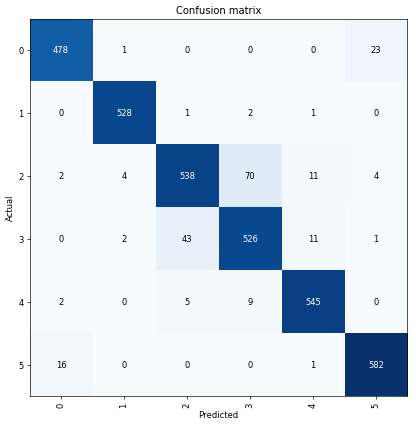

In [11]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [12]:
learn_34.save('/kaggle/working/resnet34-stage1')

In [13]:
learn_34.unfreeze()

In [14]:
learn_34.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


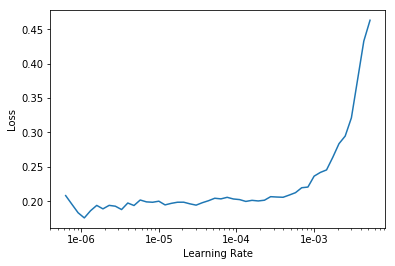

In [15]:
learn_34.recorder.plot()

In [16]:
learn_34.fit_one_cycle(1, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.193777,0.172984,0.057546,0.942455,02:35


In [17]:
learn_34.save('/kaggle/working/resnet34-stage2')

**ResNet 50**

In [18]:
learn_50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.332653,0.228291,0.076923,0.923077,03:00
1,0.244223,0.184761,0.066941,0.933059,02:59
2,0.198648,0.169842,0.062830,0.937170,03:00
3,0.153273,0.161795,0.058426,0.941574,02:58


In [19]:
interp = ClassificationInterpretation.from_learner(learn_50)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

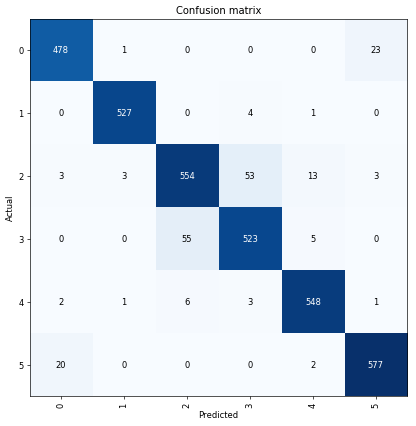

In [20]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [21]:
learn_50.save('/kaggle/working/resnet50-stage1')

In [22]:
learn_50.unfreeze()

In [23]:
learn_50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


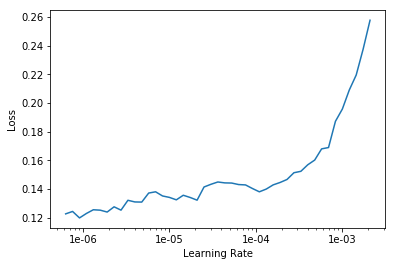

In [24]:
learn_50.recorder.plot()

In [25]:
learn_50.fit_one_cycle(1, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.148965,0.160930,0.060482,0.939519,03:21


In [26]:
learn_50.save('/kaggle/working/resnet50-stage2')

**ResNet 101**

In [27]:
learn_101.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.343708,0.230615,0.081327,0.918673,03:41
1,0.246418,0.170090,0.063124,0.936876,03:40
2,0.192117,0.165421,0.057252,0.942748,03:41
3,0.141768,0.156092,0.052554,0.947446,03:41


In [28]:
interp = ClassificationInterpretation.from_learner(learn_101)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

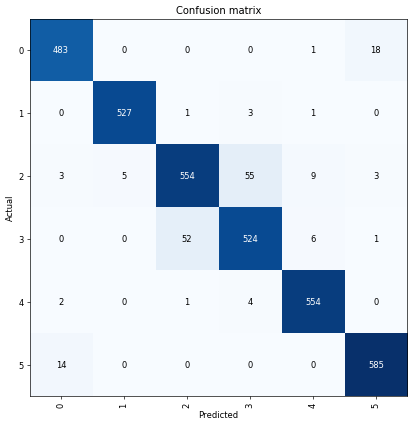

In [29]:
interp.plot_confusion_matrix(figsize=(7,7), dpi=60)

In [30]:
learn_101.save('/kaggle/working/resnet101-stage1')

In [31]:
learn_101.unfreeze()

In [32]:
learn_101.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


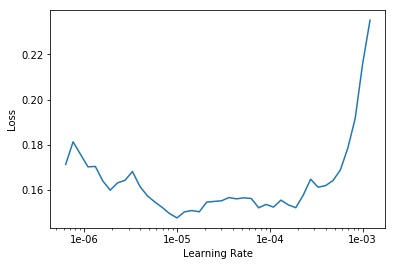

In [33]:
learn_101.recorder.plot()

In [34]:
learn_101.fit_one_cycle(1, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.134728,0.158365,0.051086,0.948914,04:19


In [35]:
learn_101.save('/kaggle/working/resnet101-stage2')